## Penguin Out of Distribution

Outlier detection games

In [48]:
import thisnotthat as tnt
import panel as pn

To make Panel based objects interactive within a notebook we need to load the panel `extension`.

In [49]:
pn.extension()

In [11]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.inspection import DecisionBoundaryDisplay
import umap
from sklearn.neighbors import LocalOutlierFactor
import hdbscan
from sklearn.mixture import GaussianMixture

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
penguins = sns.load_dataset("penguins").dropna(how="any", axis=0)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [6]:
pipe = Pipeline([('scaler', RobustScaler()), ('umap', umap.UMAP(random_state=37))])
penguin_datamap = pipe.fit_transform(penguins.select_dtypes(include="number"))

We can now build a data map out of the rescaled numeric penguins data, and create a PlotPane for it.

Finally we can link our previously constructed summary_plot `PlotSummaryPane` with our newly constructed `BokehPlotPane`.  This is done via our `link_to_plot` function which ties together the `.selected` properties of both panes.

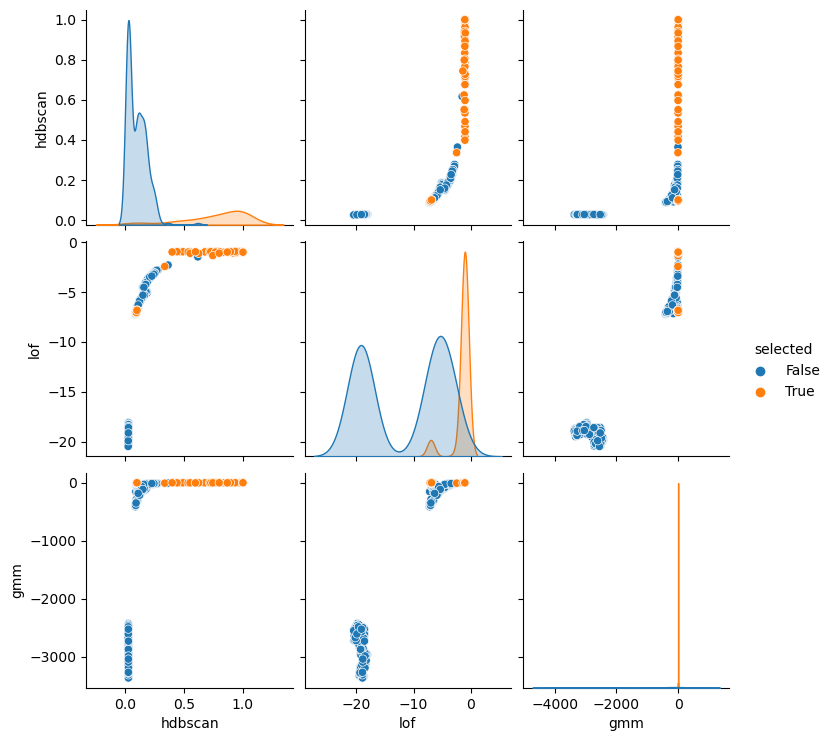

In [44]:
selected = penguins.species=='Chinstrap'

ood = hdbscan.HDBSCAN(prediction_data=True).fit(penguin_datamap[selected])
hdbscan_score = 1-hdbscan.approximate_predict_scores(ood, penguin_datamap)

lof_ood = LocalOutlierFactor(novelty=True).fit(penguin_datamap[selected])
lof_scores = lof_ood.score_samples(penguin_datamap)

gmm_ood = GaussianMixture(n_components=5).fit(penguin_datamap[selected])
gmm_scores = gmm_ood.score_samples(penguin_datamap)

import pandas as pd
ood = pd.DataFrame({'hdbscan':hdbscan_score,'lof':lof_scores, 'gmm':gmm_scores, 'selected':selected})
p = sns.pairplot(ood, hue='selected');

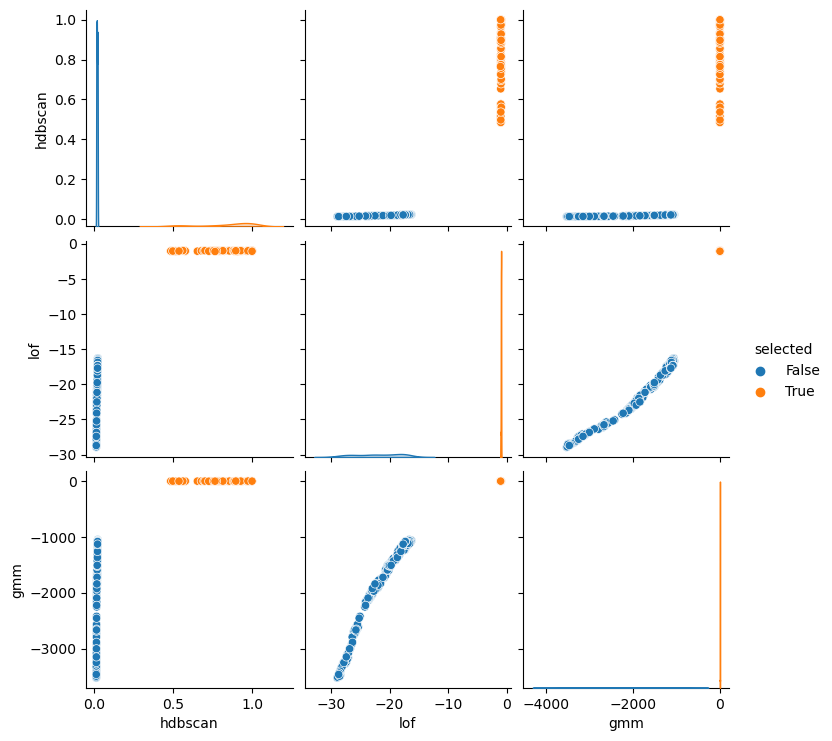

In [45]:
selected = penguins.species=='Gentoo'

ood = hdbscan.HDBSCAN(prediction_data=True).fit(penguin_datamap[selected])
hdbscan_score = 1-hdbscan.approximate_predict_scores(ood, penguin_datamap)

lof_ood = LocalOutlierFactor(novelty=True).fit(penguin_datamap[selected])
lof_scores = lof_ood.score_samples(penguin_datamap)

gmm_ood = GaussianMixture(n_components=5).fit(penguin_datamap[selected])
gmm_scores = gmm_ood.score_samples(penguin_datamap)

import pandas as pd
ood = pd.DataFrame({'hdbscan':hdbscan_score,'lof':lof_scores, 'gmm':gmm_scores, 'selected':selected})
sns.pairplot(ood, hue='selected');

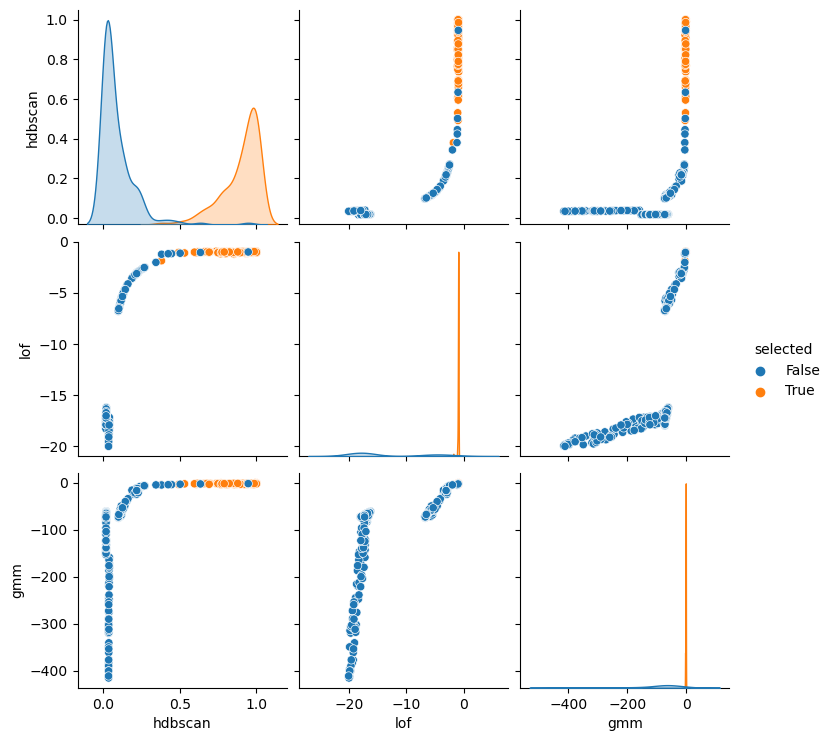

In [60]:
selected = penguins.species=='Adelie'

hdbscan_ood = hdbscan.HDBSCAN(prediction_data=True).fit(penguin_datamap[selected])
hdbscan_score = 1-hdbscan.approximate_predict_scores(hdbscan_ood, penguin_datamap)

lof_ood = LocalOutlierFactor(novelty=True).fit(penguin_datamap[selected])
lof_scores = lof_ood.score_samples(penguin_datamap)

gmm_ood = GaussianMixture(n_components=5).fit(penguin_datamap[selected])
gmm_scores = gmm_ood.score_samples(penguin_datamap)

import pandas as pd
ood = pd.DataFrame({'hdbscan':hdbscan_score,'lof':lof_scores, 'gmm':gmm_scores, 'selected':selected})
sns.pairplot(ood, hue='selected');

In [90]:
gmm_grid_pred.shape

(50, 50)

In [121]:
selected = penguins.species=='Chinstrap'

feature_1, feature_2 = np.meshgrid(
    np.linspace(penguin_datamap[:, 0].min(), penguin_datamap[:, 0].max()), 
    np.linspace(penguin_datamap[:, 1].min(), penguin_datamap[:, 1].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

#hdbscan 
hdbscan_ood = hdbscan.HDBSCAN(prediction_data=True).fit(penguin_datamap[selected])
grid_predicted = 1-hdbscan.approximate_predict_scores(hdbscan_ood, grid)
hdbscan_grid_pred = np.reshape(grid_predicted, feature_1.shape)

lof_ood = LocalOutlierFactor(novelty=True).fit(penguin_datamap[selected])
grid_predicted = lof_ood.score_samples(grid)
lof_grid_pred = np.reshape(grid_predicted, feature_1.shape)

gmm_ood = GaussianMixture(n_components=10).fit(penguin_datamap[selected])
grid_predicted = gmm_ood.score_samples(grid)
gmm_grid_pred = np.reshape(grid_predicted, feature_1.shape)

outlier_grid = [hdbscan_grid_pred, lof_grid_pred, gmm_grid_pred]
titles = ['hdbscan outlier scores', 'lof outlier scores', 'gmm outlier scores']

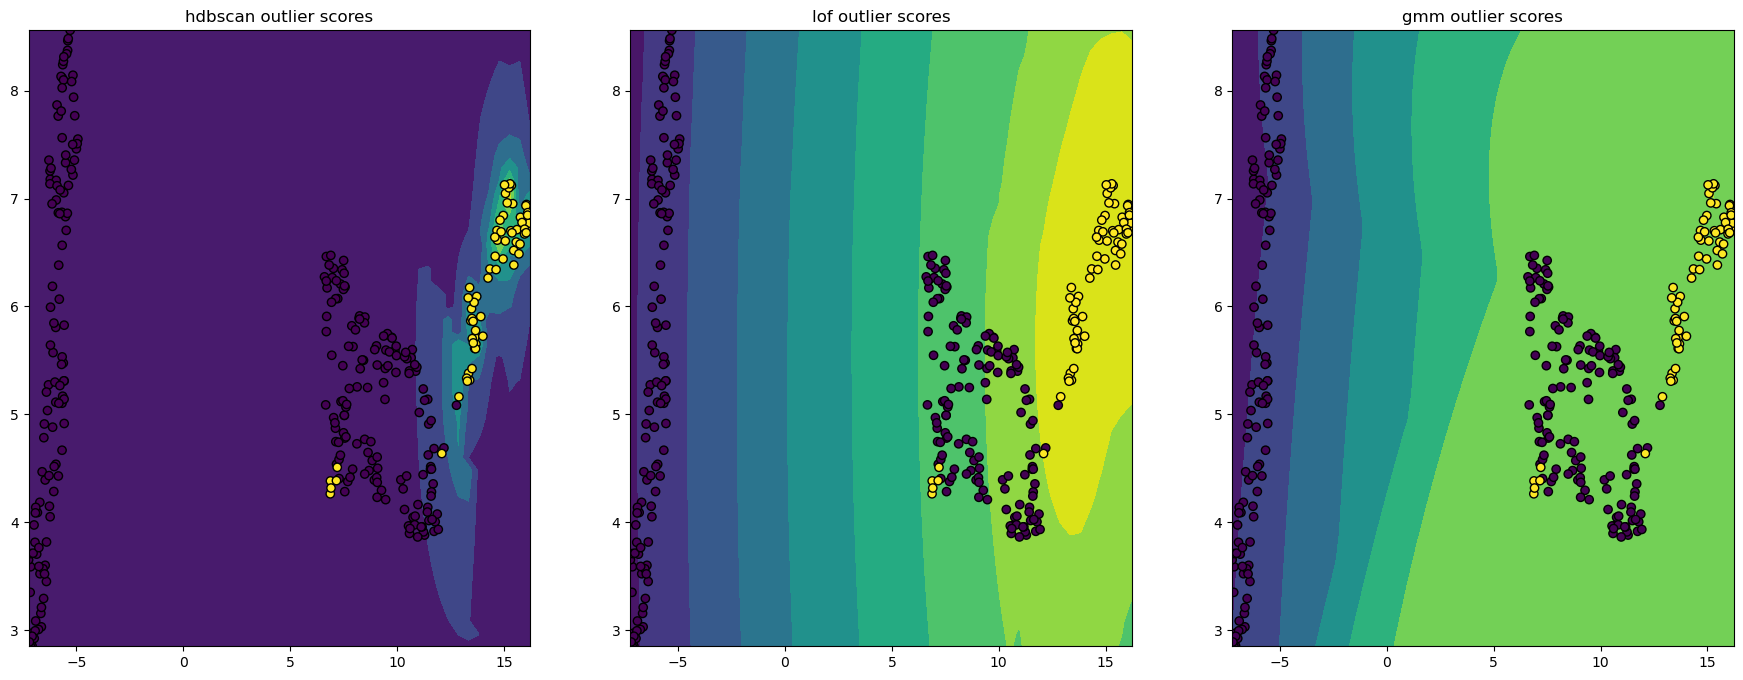

In [122]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22,8))
ax = ax.T.flatten()
i = 0

for i in range(3):
    disp = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=outlier_grid[i])
    disp.plot(ax=ax[i])
    ax[i].scatter(penguin_datamap[:, 0], penguin_datamap[:, 1], c=selected, edgecolor="k")
    ax[i].title.set_text(titles[i])

In [ ]:
disp = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)
disp.plot()
disp.ax_.scatter(penguin_datamap[:, 0], penguin_datamap[:, 1], c=selected, edgecolor="k")

In [47]:
import thisnotthat as tnt

In [ ]:
ood = hdbscan.HDBSCAN(prediction_data=True).fit(penguin_datamap[selected])
hdbscan_score = 1-hdbscan.approximate_predict_scores(ood, penguin_datamap)

lof_ood = LocalOutlierFactor(novelty=True).fit(penguin_datamap[selected])
lof_scores = lof_ood.score_samples(penguin_datamap)

gmm_ood = GaussianMixture(n_components=5).fit(penguin_datamap[selected])
gmm_scores = gmm_ood.score_samples(penguin_datamap)

In [ ]:
plot = tnt.BokehPlotPane(
    penguin_datamap,
    labels=penguins.species,
    hover_text=penguins.island,
    legend_location="top_right",
    title="Penguins data map",
)